In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True, shuffle_files=True, as_supervised=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteFC249U/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:

def splites(dataset, TRAIN_RATIO, TEST_RATIO, VAL_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(DATASET_SIZE*TRAIN_RATIO))

  remain_dataset = dataset.skip(int(DATASET_SIZE*TRAIN_RATIO))

  val_dataset = remain_dataset.take(int(DATASET_SIZE*VAL_RATIO))

  test_dataset = remain_dataset.skip(int(DATASET_SIZE*TEST_RATIO))
  return train_dataset, val_dataset, test_dataset


In [4]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VAL_RATIO = 0.1
train_dataset, val_dataset, test_dataset = splites(dataset[0], TRAIN_RATIO, TEST_RATIO, VAL_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), val_dataset, test_dataset)

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] <_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_SkipDataset element_spec=(TensorSpec(shape=(None, N

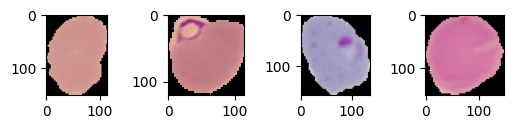

In [5]:
for i, (image, label) in enumerate(train_dataset.take(4)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image),

In [6]:
IMG_SIZE = 224

def resizing(image, label):
  return tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255, label

In [7]:
train_dataset = train_dataset.map(resizing)
val_dataset = val_dataset.map(resizing)
test_dataset = test_dataset.map(resizing)

In [8]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [9]:
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE),


In [10]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpo28ffc1atfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [11]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(filters = 6, kernel_size= 3, strides=1, padding='valid', activation='relu',),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters = 16, kernel_size= 3, strides=1, padding='valid', activation='relu',),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid'),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss=BinaryCrossentropy(),
              metrics = 'accuracy'
              )

In [13]:
history = model.fit(train_dataset,validation_data=val_dataset, epochs=10, verbose=1)

Epoch 1/10
689/689 [==============================] - 93s 110ms/step - loss: 0.3126 - accuracy: 0.8694 - val_loss: 0.2310 - val_accuracy: 0.9368
Epoch 2/10
689/689 [==============================] - 43s 62ms/step - loss: 0.1907 - accuracy: 0.9363 - val_loss: 0.2058 - val_accuracy: 0.9292
Epoch 3/10
689/689 [==============================] - 51s 73ms/step - loss: 0.1708 - accuracy: 0.9461 - val_loss: 0.1921 - val_accuracy: 0.9426
Epoch 4/10
689/689 [==============================] - 46s 67ms/step - loss: 0.1650 - accuracy: 0.9483 - val_loss: 0.8149 - val_accuracy: 0.5158
Epoch 5/10
689/689 [==============================] - 50s 73ms/step - loss: 0.1709 - accuracy: 0.9433 - val_loss: 0.8546 - val_accuracy: 0.6298
Epoch 6/10
689/689 [==============================] - 51s 74ms/step - loss: 0.1438 - accuracy: 0.9538 - val_loss: 0.2075 - val_accuracy: 0.9488
Epoch 7/10
689/689 [==============================] - 51s 73ms/step - loss: 0.1895 - accuracy: 0.9359 - val_loss: 0.4997 - val_accuracy

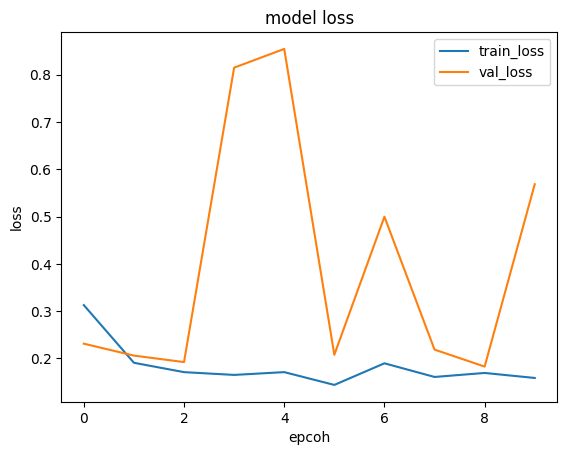

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epcoh')
plt.legend(['train_loss', 'val_loss'])
plt.show()


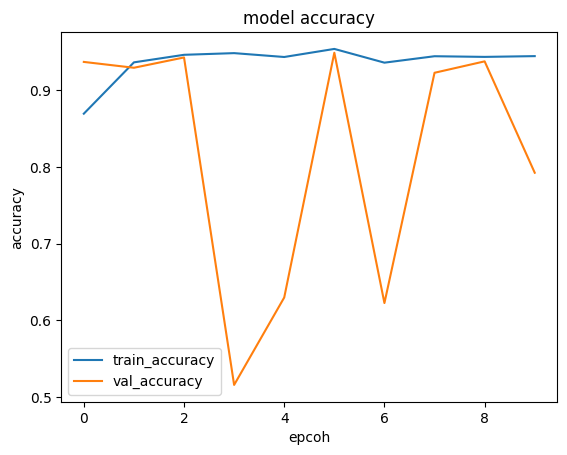

In [15]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epcoh')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [16]:
test_dataset = test_dataset.batch(1)
model.evaluate(test_dataset)

2757/2757 [==============================] - 22s 4ms/step - loss: 0.4962 - accuracy: 0.7827


[0.4962364435195923, 0.7827348709106445]

In [17]:
x = model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 11s 11s/step


In [18]:
x

0.3684337

In [19]:
def result(x):
  if(x<0.5):
    return 'P'
  else:
    return 'U'

In [20]:
result(x)

'P'

1/1 [==============================] - 0s 28ms/step


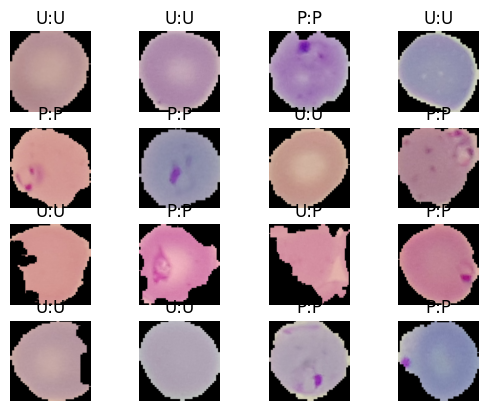

In [21]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image[0])
  plt.title(str(result(label.numpy()[0]))+ ':'+ str(result(model.predict(image)[0][0])))
  plt.axis('off')